In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.DataFrame(data.data,columns=['age',
                                    'sex','bmi','bp','s1',
                                    's2','s3','s4','s5','s6'])

X = df
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [3]:
from sklearn.tree import DecisionTreeRegressor

params = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10.15,20,25],
    'max_features':['auto','sqrt','log2']
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params, cv=5,scoring='neg_mean_squared_error')

import warnings
warnings.filterwarnings('ignore')

grid.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [4]:
grid.best_estimator_

,criterion,'friedman_mse'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [10]:
model = DecisionTreeRegressor(criterion= 'friedman_mse',max_depth= 3,max_features= 'log2',splitter= 'best')

In [6]:
grid.best_score_

np.float64(-3985.919085713494)

In [7]:
y_pred = grid.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

3839.1394967068095
51.74795835875193


[Text(0.5, 0.875, 'x[6] <= -0.016\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.625, 'x[2] <= 0.056\nfriedman_mse = 5652.418\nsamples = 145\nvalue = 189.952'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 0.004\nfriedman_mse = 4247.254\nsamples = 106\nvalue = 167.17'),
 Text(0.0625, 0.125, 'friedman_mse = 3666.95\nsamples = 57\nvalue = 147.544'),
 Text(0.1875, 0.125, 'friedman_mse = 3953.02\nsamples = 49\nvalue = 190.0'),
 Text(0.375, 0.375, 'x[0] <= -0.055\nfriedman_mse = 4226.83\nsamples = 39\nvalue = 251.872'),
 Text(0.3125, 0.125, 'friedman_mse = 0.0\nsamples = 1\nvalue = 128.0'),
 Text(0.4375, 0.125, 'friedman_mse = 3923.641\nsamples = 38\nvalue = 255.132'),
 Text(0.75, 0.625, 'x[7] <= -0.014\nfriedman_mse = 4820.298\nsamples = 208\nvalue = 128.49'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.008\nfriedman_mse = 3763.961\nsamples = 130\nvalue = 111.092'),
 Text(0.5625, 0.125, 'friedman_mse = 2563.844\nsamples = 108\nvalu

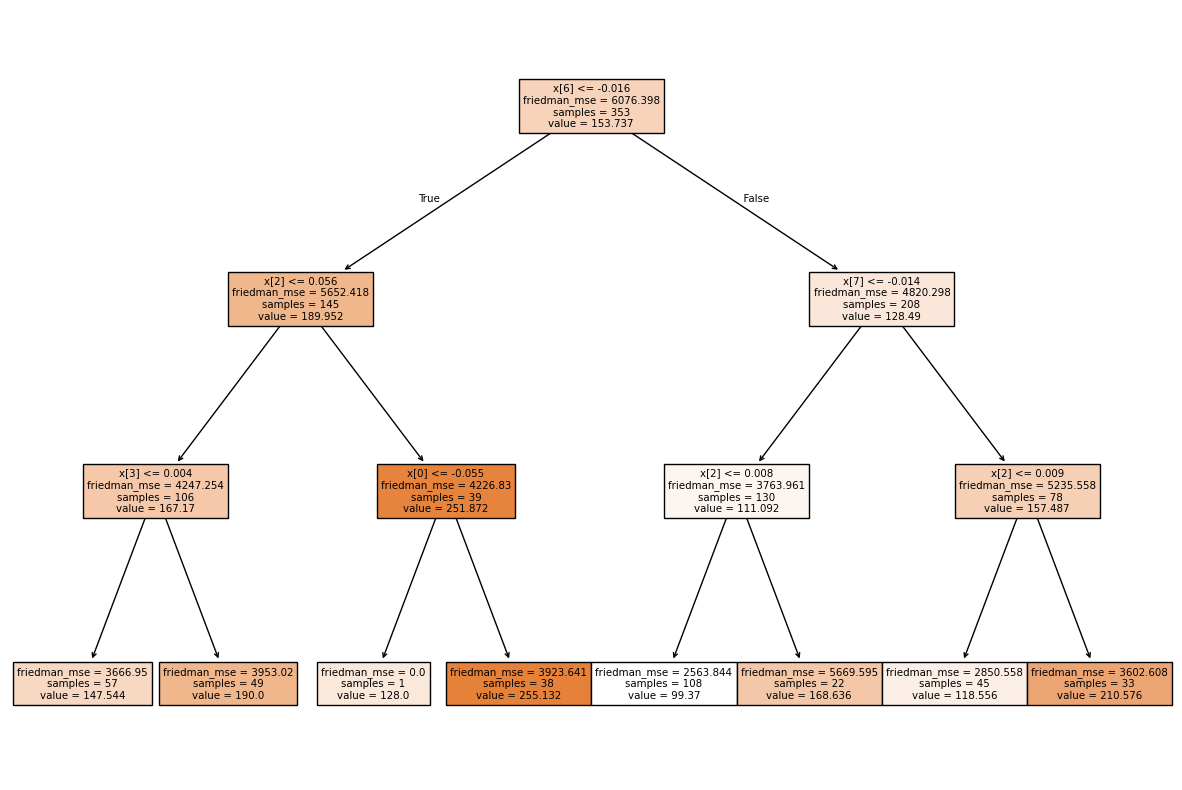

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
model.fit(X_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)